In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
pd.set_option('display.max_columns', None) #allows me to see all columns in a datafram

In [3]:
# import data and make all column titles lowercase
wego = pd.read_csv(r'C:\da12\projects\wego-python-da12-python-spice-lattes\data\Headway Data, 8-1-2023 to 9-30-2023.csv')
wego.columns = [x.lower() for x in wego.columns]
wego.head()

,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
# dropped all NaN values from hdwy_dev column
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [7]:
# filter out adherence and hdwy_dev values that seem to be outliers
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean = wego_clean[wego_clean['adherence'].between(-25, 10)]
wego_clean = wego_clean[wego_clean['hdwy_dev'].between(-20,40)]
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [9]:
# create a column that has the average adherence per route
adherence_mean_serie = wego_clean.groupby('route_abbr')['adherence'].mean()
wego_clean['mean_adherence'] = wego_clean['route_abbr'].map(adherence_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569


In [11]:
# create a column that has the average headway deviation per route
headway_mean_serie = wego_clean.groupby('route_abbr')['hdwy_dev'].mean()
wego_clean['mean_hdwy_dev'] = wego_clean['route_abbr'].map(headway_mean_serie)
wego_clean.head()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes,mean_adherence,mean_hdwy_dev
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,-2.01569,0.395173
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-2.01569,0.395173
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,-2.01569,0.395173
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,-2.01569,0.395173


In [15]:
# creating a list of route names to title each plot
abbr_route = {1: 'Route 3',
             2: 'Route 7',
             3: 'Route 22',
             4: 'Route 23',
             5: 'Route 50',
             6: 'Route 52',
             7: 'Route 55',
             8: 'Route 56'}
             

Ridgeline for adherence

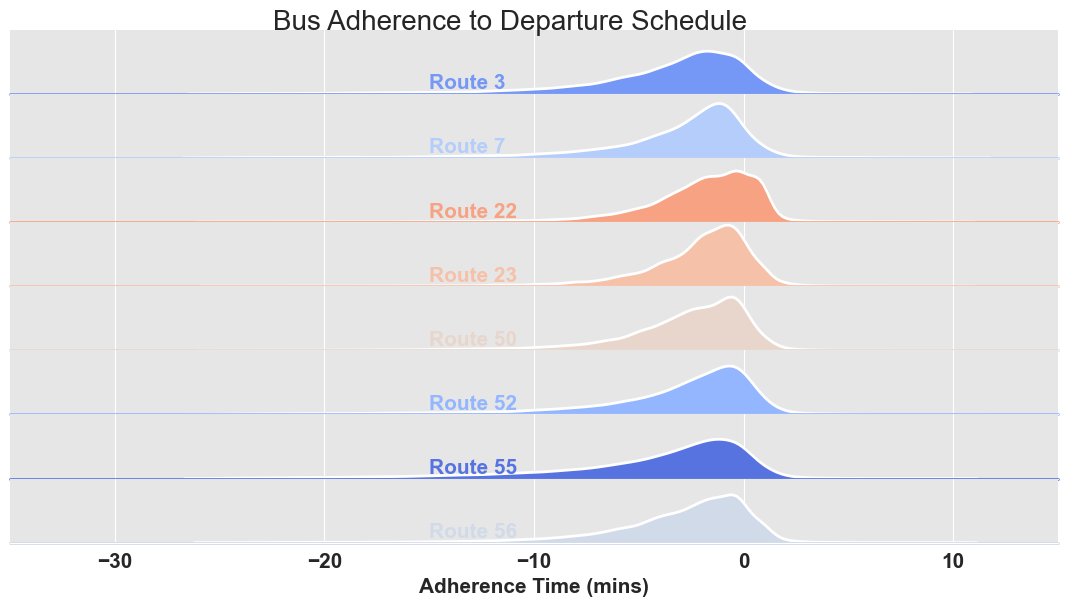

In [18]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'adherence',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'adherence', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-35, 15)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Adherence Time (mins)', fontweight='bold', fontsize=15)
g.fig.suptitle('Bus Adherence to Departure Schedule',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")

Ridgeline for headway deviation

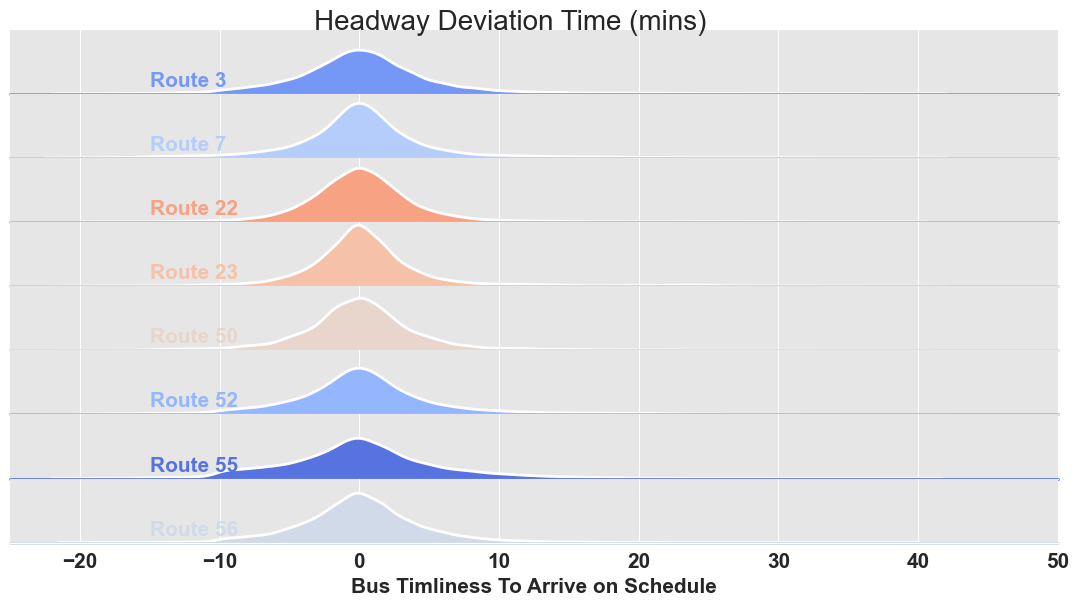

In [23]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=10)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(wego_clean, row='route_abbr', hue='mean_adherence', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'hdwy_dev',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'hdwy_dev', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set_xlim(-25, 50)
    ax.text(-15, 0.02, abbr_route[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=0.0)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Bus Timliness To Arrive on Schedule', fontweight='bold', fontsize=15)
g.fig.suptitle('Headway Deviation Time (mins)',
               ha='center',
               fontsize=20,
               fontweight=20)

# plt.figure(figsize=(10, 10))
plt.show()

# g.savefig("ridgeline.png")